In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Get food data
FOOD_CSV = 'data/wheat_rice_maize.csv'
food = pd.read_csv(FOOD_CSV)

In [3]:
# Normalize units
t_1000 = food['Unit'].str.contains('1000')
food.loc[t_1000, 'Value'] *= 1000
food.loc[t_1000, 'Unit'] = 't'

In [4]:
# Food masks
food_masks = dict({
    'wheat': food['Item'].str.contains('Wheat'),
    'rice': food['Item'].str.contains('Rice'),
    'maize': food['Item'].str.contains('Maize')
})

In [5]:
# Product balance masks
balance_masks = dict({
    'total': food['Element'].str.contains('Production'),
    'food': food['Element'].str.contains('Food'),
    'loss': food['Element'].str.contains('Losses')
})

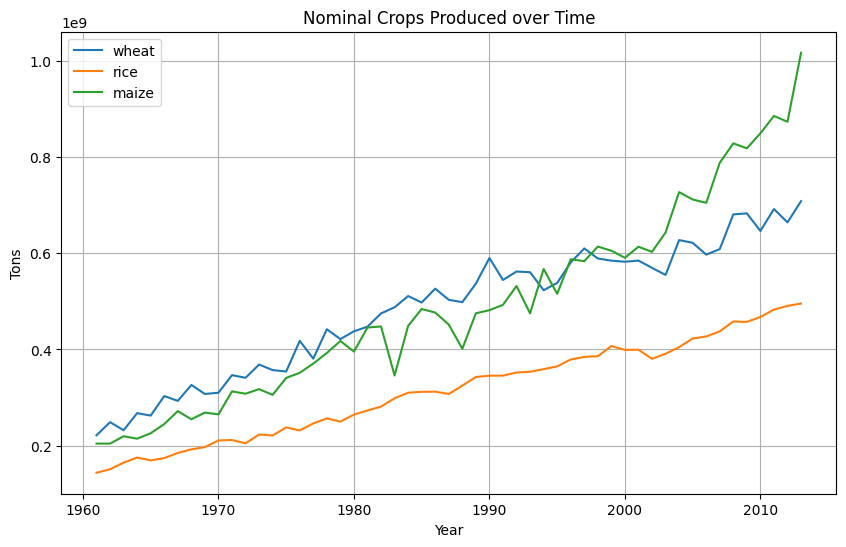

In [6]:
# Nominal crop total production
plt.figure(figsize=(10,6))

for key, mask in food_masks.items():
    nominal_total = food[mask & balance_masks['total']].copy().reset_index()
    plt.plot(nominal_total['Year'], nominal_total['Value'], label=key)

plt.xlabel('Year')
plt.ylabel('Tons')
plt.title('Nominal Crops Produced over Time')

plt.legend(loc='best')
plt.grid(True)
plt.show()

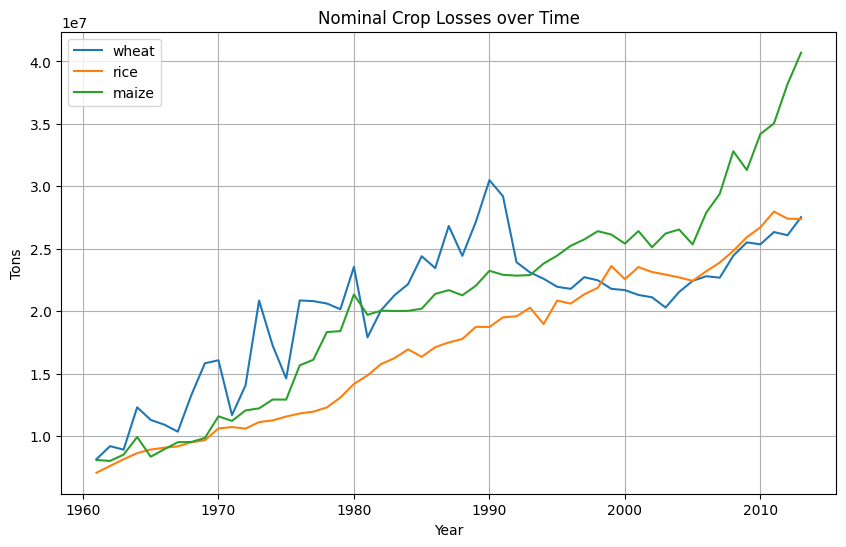

In [7]:
# Nominal crop losses
plt.figure(figsize=(10,6))

for key, mask in food_masks.items():
    nominal_total = food[mask & balance_masks['loss']].copy().reset_index()
    plt.plot(nominal_total['Year'], nominal_total['Value'], label=key)

plt.xlabel('Year')
plt.ylabel('Tons')
plt.title('Nominal Crop Losses over Time')

plt.legend(loc='best')
plt.grid(True)
plt.show()

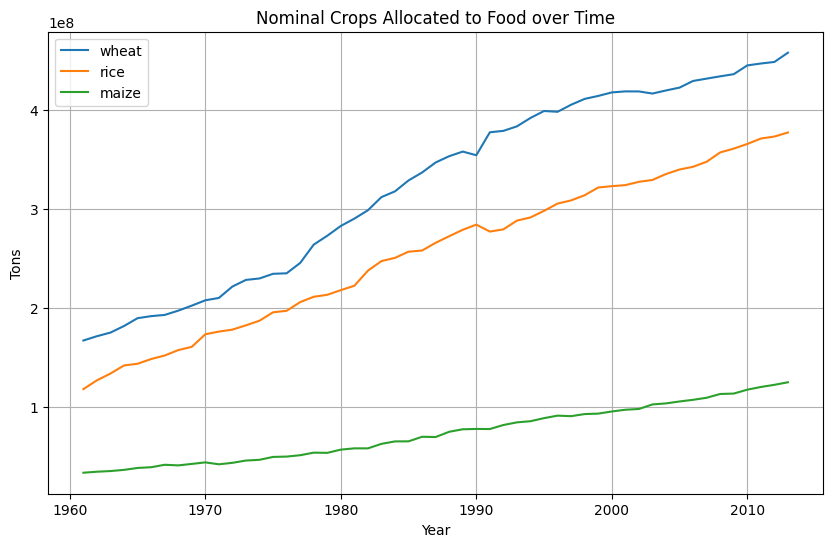

In [10]:
# Nominal crop human allocation
plt.figure(figsize=(10,6))

for key, mask in food_masks.items():
    nominal_total = food[mask & balance_masks['food']].copy().reset_index()
    plt.plot(nominal_total['Year'], nominal_total['Value'], label=key)

plt.xlabel('Year')
plt.ylabel('Tons')
plt.title('Nominal Crops Allocated to Food over Time')

plt.legend(loc='best')
plt.grid(True)
plt.show()

In [11]:
# Get population data
POPULATION_CSV = 'data/population_world.csv'
pop = pd.read_csv(POPULATION_CSV)

In [13]:
# Normalize units
no_1000 = pop['Unit'].str.contains('1000')
pop.loc[no_1000, 'Value'] *= 1000
pop.loc[no_1000, 'Unit'] = 'No'

In [16]:
# Filter unused years
used_years = (pop['Year'] >= 1961) & (pop['Year'] <= 2013)
pop = pop[used_years].copy().reset_index()

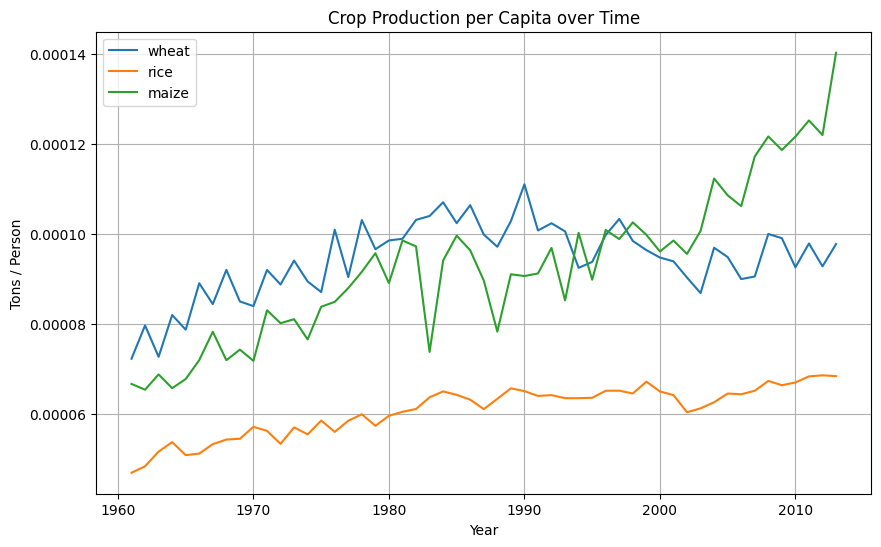

In [23]:
# Crop production per capita
plt.figure(figsize=(10,6))

for key, mask in food_masks.items():
    nominal_total = food[mask & balance_masks['total']].copy().reset_index()
    plt.plot(nominal_total['Year'], nominal_total['Value'].divide(pop['Value']), label=key)

plt.xlabel('Year')
plt.ylabel('Tons / Person')
plt.title('Crop Production per Capita over Time')

plt.legend(loc='best')
plt.grid(True)
plt.show()

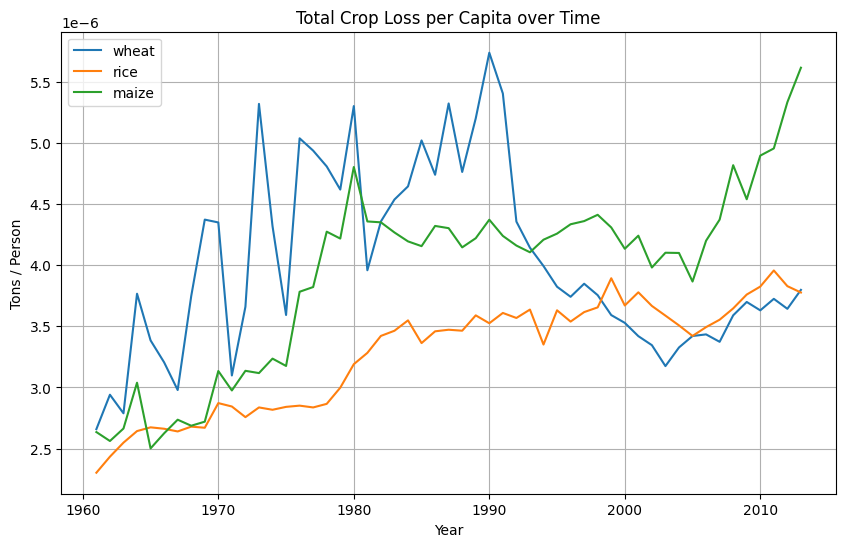

In [20]:
# Crop loss per capita
plt.figure(figsize=(10,6))

for key, mask in food_masks.items():
    nominal_total = food[mask & balance_masks['loss']].copy().reset_index()
    plt.plot(nominal_total['Year'], nominal_total['Value'].divide(pop['Value']), label=key)

plt.xlabel('Year')
plt.ylabel('Tons / Person')
plt.title('Crop Loss per Capita over Time')

plt.legend(loc='best')
plt.grid(True)
plt.show()

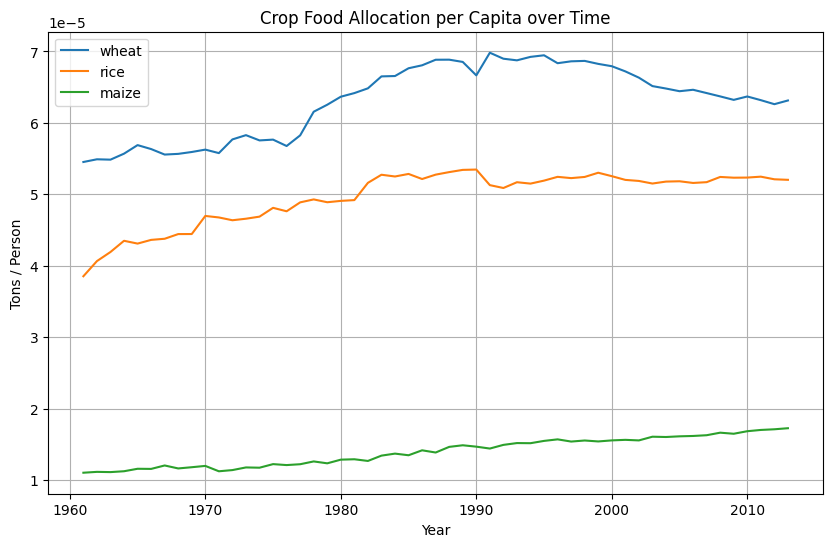

In [22]:
# Crop food allocation per capita
plt.figure(figsize=(10,6))

for key, mask in food_masks.items():
    nominal_total = food[mask & balance_masks['food']].copy().reset_index()
    plt.plot(nominal_total['Year'], nominal_total['Value'].divide(pop['Value']), label=key)

plt.xlabel('Year')
plt.ylabel('Tons / Person')
plt.title('Crop Food Allocation per Capita over Time')

plt.legend(loc='best')
plt.grid(True)
plt.show()

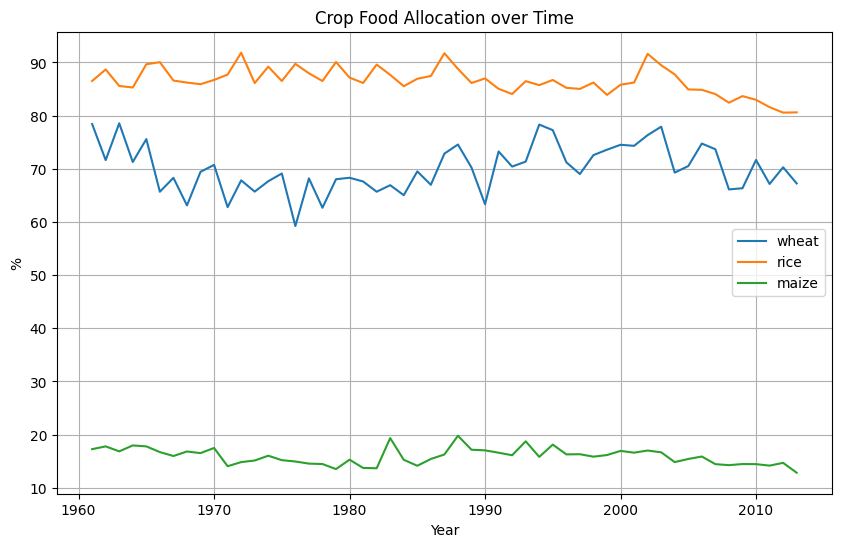

In [28]:
# Crop food allocation as a percentage
plt.figure(figsize=(10,6))

for key, mask in food_masks.items():
    total = food[mask & balance_masks['total']].copy().reset_index()
    loss = food[mask & balance_masks['loss']].copy().reset_index()
    allocated = food[mask & balance_masks['food']].copy().reset_index()
    plt.plot(nominal_total['Year'], allocated['Value'].divide(total['Value'].subtract(loss['Value'])).multiply(100), label=key)

plt.xlabel('Year')
plt.ylabel('%')
plt.title('Crop Food Allocation over Time')

plt.legend(loc='best')
plt.grid(True)
plt.show()